In [1]:
# The dataset gives us electronics sales data at Amazon. 

# It contains user ratings for various electronics items sold, along with category of each item and time of sell.

# The dataset is available at https://www.kaggle.com/datasets/edusanketdk/electronics

# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import matplotlib.patches as patches
import seaborn as sns
from matplotlib.animation import FuncAnimation

#importing the dataset

data=pd.read_csv("electronics.csv")

# list of the first five rows

data.head()

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,NaN,1999,NaN,0
1,0,1,5.0,1999-06-14,Female,Portable Audio & Video,NaN,1999,NaN,0
2,0,2,3.0,1999-06-17,Female,Portable Audio & Video,NaN,1999,NaN,0
3,0,3,1.0,1999-07-01,Female,Portable Audio & Video,NaN,1999,NaN,0
4,0,4,2.0,1999-07-06,Female,Portable Audio & Video,NaN,1999,NaN,0


In [2]:
# shape

data.shape

(1292954, 10)

In [3]:
# info about the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292954 entries, 0 to 1292953
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   item_id     1292954 non-null  int64  
 1   user_id     1292954 non-null  int64  
 2   rating      1292954 non-null  float64
 3   timestamp   1292954 non-null  object 
 4   model_attr  1292954 non-null  object 
 5   category    1292954 non-null  object 
 6   brand       331120 non-null   object 
 7   year        1292954 non-null  int64  
 8   user_attr   174124 non-null   object 
 9   split       1292954 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 98.6+ MB


In [4]:
# We can see that the dataset contains 5 columns and 10000 rows.    

# The columns are as follows:

# 1. User ID

# 2. Product ID

# 3. Rating

# 4. Timestamp

# 5. Category

# The data types of the columns are as follows:

# 1. User ID - int64

# 2. Product ID - object

# 3. Rating - int64

# 4. Timestamp - int64

# 5. Category - object

# We can see that the columns User ID and Rating are of int64 data type, while the columns Product ID and Category are of object data type.

# We can also see that there are no null values in the dataset.

# We can also see that the column Timestamp is of int64 data type, but it is actually a timestamp.

# We can convert it to a timestamp using the following code:

from datetime import datetime

pd.to_datetime(data['timestamp'])

0         1999-06-13
1         1999-06-14
2         1999-06-17
3         1999-07-01
4         1999-07-06
             ...    
1292949   2018-09-26
1292950   2018-09-26
1292951   2018-09-26
1292952   2018-09-29
1292953   2018-10-01
Name: timestamp, Length: 1292954, dtype: datetime64[ns]

In [5]:
# We can also see that the column Product ID is of object data type, but it is actually a string.

#converting it to a string :

data['brand'] = data['brand'].astype(str)

In [6]:
# We can also see that the column Category is of object data type, but it is actually a string.

# converting it to a string:

data['category'] = data['category'].astype(str)

In [7]:
# We can also see that the column Timestamp is of int64 data type, but it is actually a timestamp.

#converting it to a timestamp :

data['timestamp'] = pd.to_datetime(data['timestamp'])

In [8]:
# We can also see that the column Rating is of int64 data type, but it is actually a float.

#converting it to a float:

data['rating'] = data['rating'].astype(float)

In [9]:
# We can also see that the column User ID is of int64 data type, but it is actually a string.

#converting it to a string :

data['user_id'] = data['user_id'].astype(str)

In [10]:
# We can also see that the column Product ID is of object data type, but it is actually a string.

# We can convert it to a string using the following code:

data['item_id'] = data['item_id'].astype(str)

In [11]:
# we can also see the statistical summary of the dataset.

data.describe()

,rating,timestamp,year,split
count,1.292954e+06,1292954,1.292954e+06,1.292954e+06
mean,4.051482e+00,2015-06-18 11:30:34.851355904,2.012938e+03,1.747587e-01
min,1.000000e+00,1999-06-13 00:00:00,1.999000e+03,0.000000e+00
25%,4.000000e+00,2014-09-06 00:00:00,2.012000e+03,0.000000e+00
50%,5.000000e+00,2015-10-19 00:00:00,2.014000e+03,0.000000e+00
75%,5.000000e+00,2016-10-19 00:00:00,2.015000e+03,0.000000e+00
max,5.000000e+00,2018-10-01 00:00:00,2.018000e+03,2.000000e+00
std,1.379732e+00,NaN,2.643513e+00,5.506810e-01


In [12]:
# the statistical summary of the dataset gives us the following information:

# 1. The mean rating is 4.

# 2. The minimum rating is 1.

# 3. The maximum rating is 5.

# 4. The standard deviation of the ratings is 1.4.

# 5. The 25th percentile of the ratings is 4.

# 6. The 50th percentile of the ratings is 5.

# 7. The 75th percentile of the ratings is 5.

In [13]:
#we can see number unique users and items

data.nunique()

item_id          9560
user_id       1157633
rating              5
timestamp        6354
model_attr          3
category           10
brand              51
year               20
user_attr           2
split               3
dtype: int64

In [14]:
#check for the duplicates

data.duplicated().sum()

0

In [15]:
#check for the missing value

data.isnull().sum()

item_id             0
user_id             0
rating              0
timestamp           0
model_attr          0
category            0
brand               0
year                0
user_attr     1118830
split               0
dtype: int64

In [16]:
#drop the column having missing values

data=data.dropna()

In [17]:
data.isnull().sum()

item_id       0
user_id       0
rating        0
timestamp     0
model_attr    0
category      0
brand         0
year          0
user_attr     0
split         0
dtype: int64

In [18]:
# distribution of the rating

data['rating'].value_counts()

rating
5.0    107593
4.0     30104
3.0     14593
1.0     12652
2.0      9182
Name: count, dtype: int64

# what was the best year for sales

In [19]:
data['year']=pd.DatetimeIndex(data['timestamp']).year
data['year'].value_counts()

year
2015    46891
2016    43907
2014    25475
2017    24753
2013    12355
2018     8874
2012     4357
2011     2679
2010     1717
2009     1220
2008      834
2007      525
2006      196
2005      149
2004       87
2003       55
2002       26
2001       18
2000        5
1999        1
Name: count, dtype: int64

# what was the best month for sales

In [20]:
data['month']=pd.DatetimeIndex(data['timestamp']).month
data['month'].value_counts()

month
1     18762
12    17134
2     15033
3     14853
8     14789
7     14439
11    13412
4     13359
5     13258
9     13155
6     12970
10    12960
Name: count, dtype: int64

In [21]:
#drop all the null values
data.dropna(inplace=True)
data.isnull().sum()

item_id       0
user_id       0
rating        0
timestamp     0
model_attr    0
category      0
brand         0
year          0
user_attr     0
split         0
month         0
dtype: int64

# Finding the answers with the visualization

# Distribution of ratings

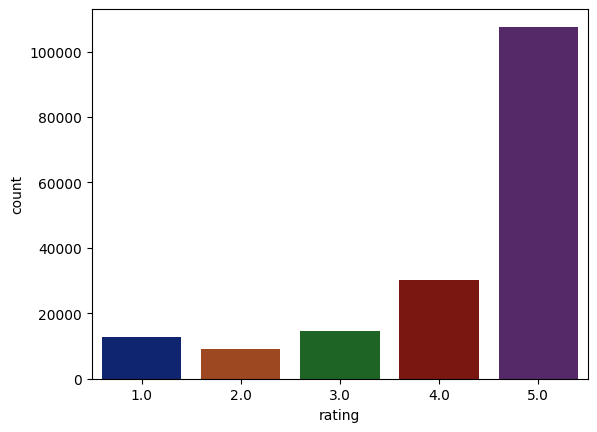

In [22]:
sns.countplot(x='rating', hue='rating', data=data, palette='dark', legend=False)
plt.show()

In [23]:
# the distribution of ratings

# The distribution of ratings is as follows:

# most of the ratings are 5

data['rating'].value_counts()

rating
5.0    107593
4.0     30104
3.0     14593
1.0     12652
2.0      9182
Name: count, dtype: int64

# Distribution of sales by year

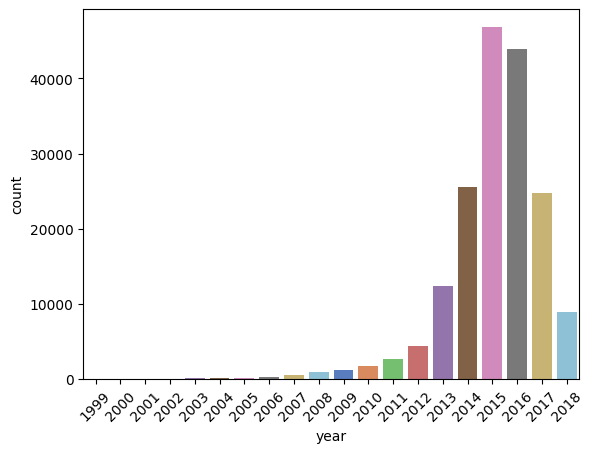

In [24]:
sns.countplot(x='year',hue='year', data=data,palette='muted', legend=False)
plt.xticks(rotation=45)
plt.show()

# Brands with most sales

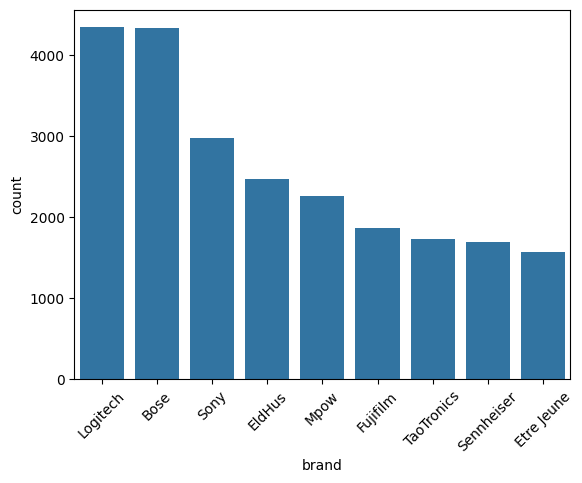

In [25]:
# sns.countplot(x='brand', hue='brand',data=data,palette='dark', legend=False)
# plt.xticks(rotation=90)
# plt.show()
sns.countplot(x='brand', data=data, order=data['brand'].value_counts().iloc[1:10].index)
plt.xticks(rotation=45)
plt.show()

# Brand name having most sales

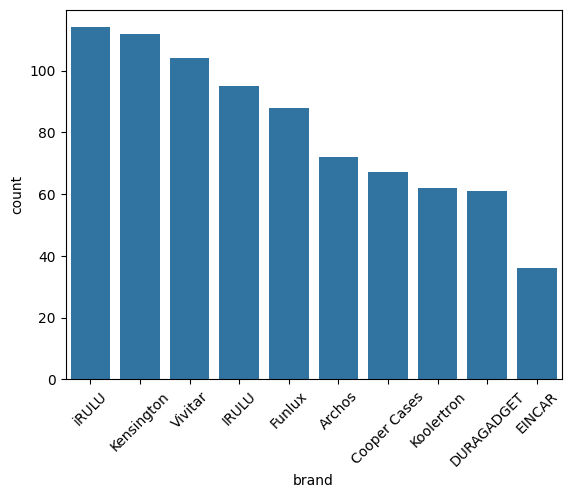

In [26]:
sns.countplot(x='brand', data=data, order=data['brand'].value_counts().iloc[-10:].index)
plt.xticks(rotation=45)
plt.show()

# Brand with most sales in 2016

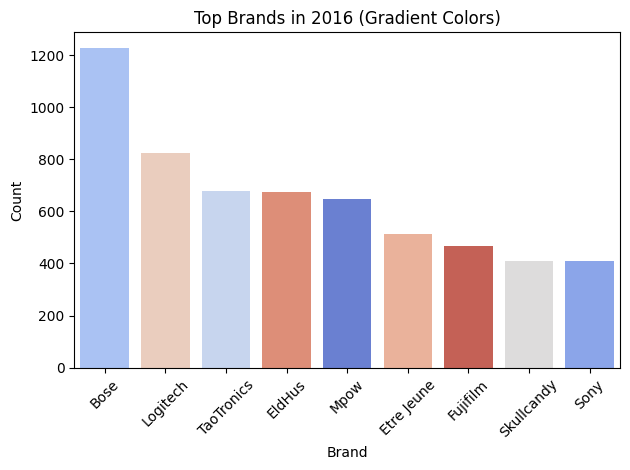

In [27]:
# Filtered data for 2016
filtered_data = data[data['year'] == 2016]

# Get top brands (2nd to 10th most frequent)
top_brands = filtered_data['brand'].value_counts().iloc[1:10].index

# Create gradient color palette
gradient_colors = sns.color_palette("coolwarm", n_colors=len(top_brands))  # Try 'magma', 'coolwarm', 'plasma'

# Plot with gradient colors
sns.countplot(
    x='brand',
    data=filtered_data[filtered_data['brand'].isin(top_brands)],
    order=top_brands,
    hue='brand',  # Add hue to make palette apply correctly
    palette=gradient_colors,
    legend=False
)

plt.xticks(rotation=45)
plt.title("Top Brands in 2016 (Gradient Colors)")
plt.xlabel("Brand")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


# Brands with most sales in 2017

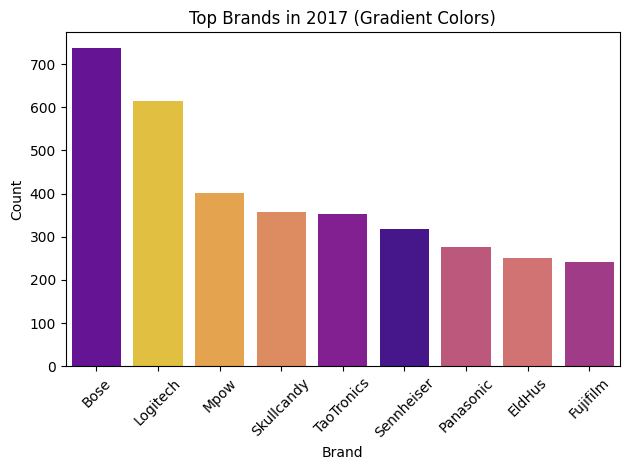

In [28]:
# Filtered data for 2017
filtered_data = data[data['year'] == 2017]

# Get top brands (2nd to 10th most frequent)
top_brands = filtered_data['brand'].value_counts().iloc[1:10].index

# Create gradient color palette
gradient_colors = sns.color_palette("plasma", n_colors=len(top_brands))  # Try 'magma', 'coolwarm', 'plasma'

# Plot with gradient colors
sns.countplot(
    x='brand',
    data=filtered_data[filtered_data['brand'].isin(top_brands)],
    order=top_brands,
    hue='brand',  # Add hue to make palette apply correctly
    palette=gradient_colors,
    legend=False
)

plt.xticks(rotation=45)
plt.title("Top Brands in 2017 (Gradient Colors)")
plt.xlabel("Brand")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Brands with most sales in the 2018

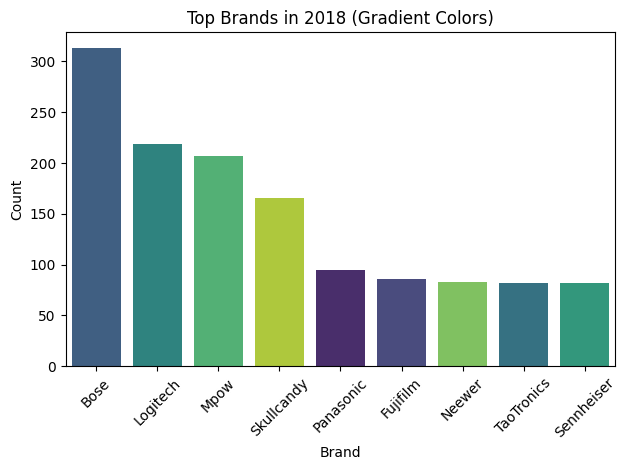

In [29]:
# Filtered data for 2018
filtered_data = data[data['year'] == 2018]

# Get top brands (2nd to 10th most frequent)
top_brands = filtered_data['brand'].value_counts().iloc[1:10].index

# Create gradient color palette
gradient_colors = sns.color_palette("viridis", n_colors=len(top_brands))  # Try 'magma', 'coolwarm', 'plasma'

# Plot with gradient colors
sns.countplot(
    x='brand',
    data=filtered_data[filtered_data['brand'].isin(top_brands)],
    order=top_brands,
    hue='brand', # Add hue to make palette apply correctly
    palette=gradient_colors,
    legend=False
)

plt.xticks(rotation=45)
plt.title("Top Brands in 2018 (Gradient Colors)")
plt.xlabel("Brand")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


# Month with most sales

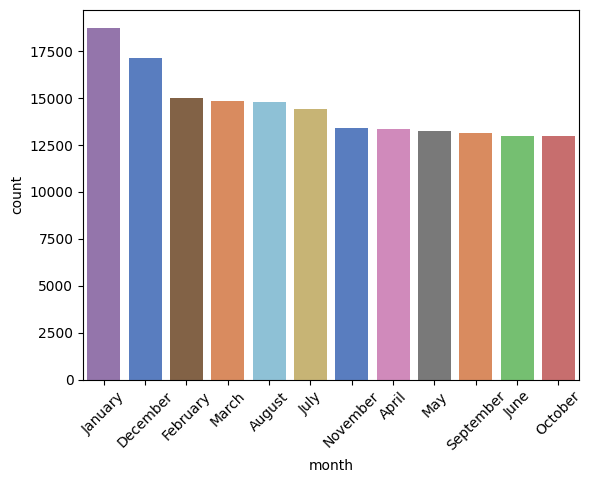

In [30]:
# Ensure 'timestamp' is a datetime column
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Create a new 'month' column from the 'date'
data['month'] = data['timestamp'].dt.month_name()  # Or .dt.month for numeric

# Now plot
sns.countplot(x='month',hue='month', data=data,palette='muted', order=data['month'].value_counts().index,legend=False)
plt.xticks(rotation=45)
plt.show()


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174124 entries, 28 to 1292953
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   item_id     174124 non-null  object        
 1   user_id     174124 non-null  object        
 2   rating      174124 non-null  float64       
 3   timestamp   174124 non-null  datetime64[ns]
 4   model_attr  174124 non-null  object        
 5   category    174124 non-null  object        
 6   brand       174124 non-null  object        
 7   year        174124 non-null  int32         
 8   user_attr   174124 non-null  object        
 9   split       174124 non-null  int64         
 10  month       174124 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(7)
memory usage: 15.3+ MB


In [32]:
print(data.columns)

Index(['item_id', 'user_id', 'rating', 'timestamp', 'model_attr', 'category',
       'brand', 'year', 'user_attr', 'split', 'month'],
      dtype='object')


# What products most sales in the month of january

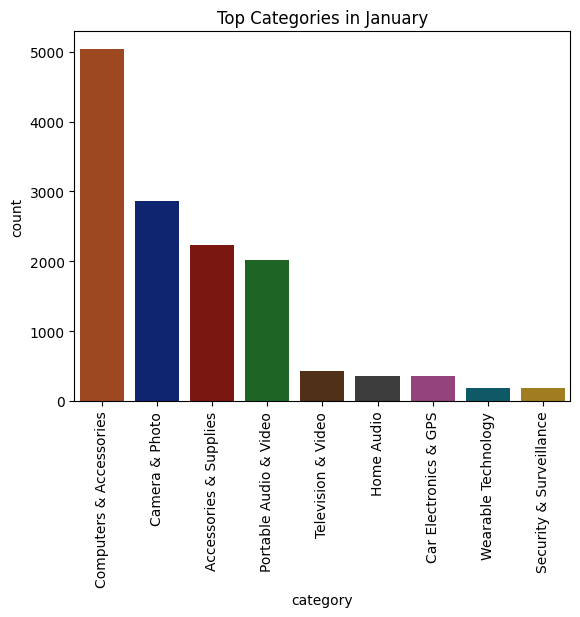

In [33]:
# Filter data first
jan_data = data[data['month'] == 'January']

# Get top categories from just January data
top_categories = jan_data['category'].value_counts().iloc[1:10].index

# Now plot
sns.countplot(x='category', hue='category',data=jan_data,palette='dark', order=top_categories,legend=False)
plt.xticks(rotation=90)
plt.title("Top Categories in January")
plt.show()


# Category with least sales

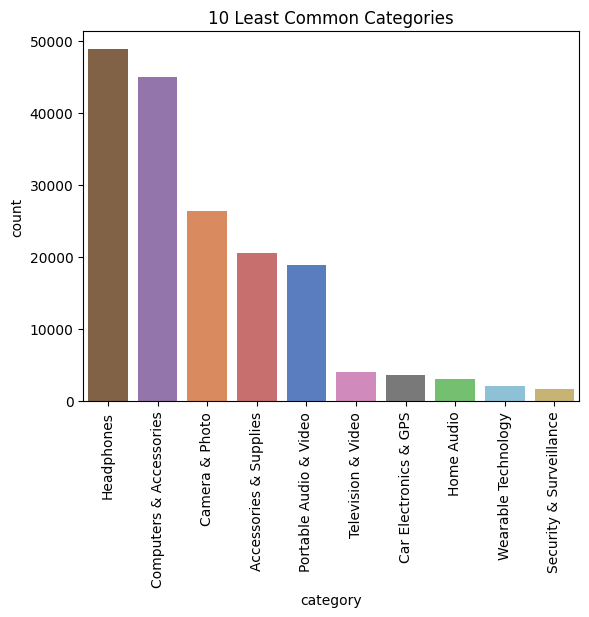

In [34]:
# Get 10 least frequent category names
least_common = data['category'].value_counts().iloc[-10:].index

# Plot using those
sns.countplot(x='category',hue='category', data=data,palette='muted',order=least_common,legend=False)
plt.xticks(rotation=90)
plt.title("10 Least Common Categories")
plt.show()

# Distribution of sales by the piechart

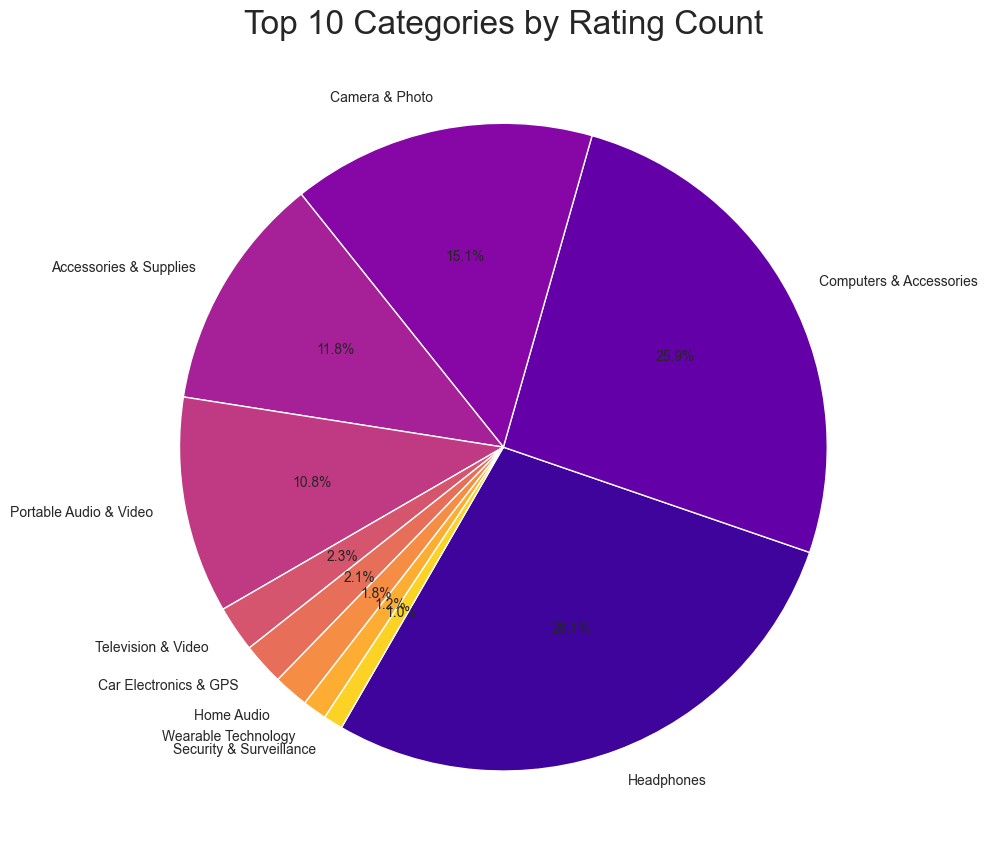

In [52]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd

# Set white background
sns.set_style('white')

# Get top 10 categories by rating count
category_counts = data.groupby('category')['rating'].count().sort_values(ascending=False).head(10)

# Create a gradient color palette (you can try 'plasma', 'magma', 'viridis', etc.)
colors = sns.color_palette("plasma", n_colors=10)

# Plot pie chart
plt.figure(figsize=(10, 10))  # 📏 Make it bigger (width, height in inches)
category_counts.plot(
    kind='pie',
    autopct='%2.1f%%',
    startangle=240,
    colors=colors,
    wedgeprops={'edgecolor': 'white'}  # cleaner look
)

plt.ylabel('')  # hide y-axis label
plt.title('Top 10 Categories by Rating Count', fontsize=24)
plt.tight_layout()
plt.show()
